In [36]:
import datetime
import numpy as np
import pandas as pd
import random
import re 
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
talk_df = pd.read_csv('Data/has_transcript.csv', index_col = 0)

# Replace -- with np.nan, convert columns to appropriate types

In [108]:
talk_df.views = talk_df.views.replace('--', np.nan)
talk_df.views = talk_df.views.astype(float)

talk_df.comments = talk_df.comments.replace('--', np.nan)
talk_df.comments = talk_df.comments.astype(float)

talk_df.date_recorded = talk_df.date_recorded.replace('--', np.nan)
talk_df.date_recorded = pd.to_datetime(talk_df.date_recorded, format = '%Y-%m-%d')

talk_df.upload_date = talk_df.upload_date.replace('--', np.nan)
talk_df.upload_date = pd.to_datetime(talk_df.upload_date, format = '%Y-%m-%d')

In [110]:
talk_df.to_csv('has_transcript_clean.csv')

In [77]:
talk_df.date_recorded.min()

Timestamp('1984-02-02 00:00:00')

In [78]:
talk_df.date_recorded.max()

Timestamp('2020-01-02 00:00:00')

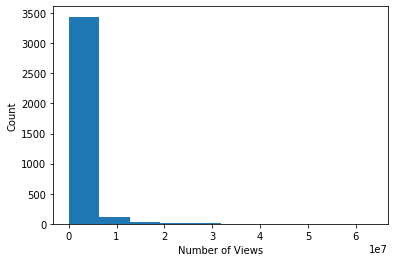

In [72]:
plt.hist(x = talk_df.views);
plt.xlabel('Number of Views');
plt.ylabel('Count');

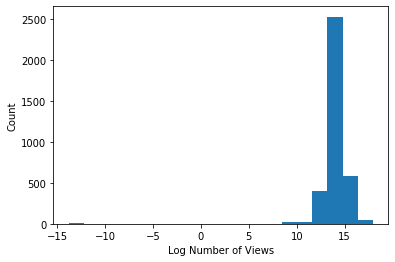

In [73]:
views_log = [x + 0.000001 if x == 0 else x for x in talk_df.views]

plt.hist(x = np.log(views_log), bins = 20);
plt.xlabel('Log Number of Views');
plt.ylabel('Count');

Text(0, 0.5, 'Count')

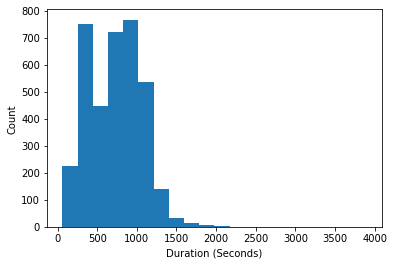

In [74]:
plt.hist(x = talk_df.duration, bins = 20);
plt.xlabel('Duration (Seconds)');
plt.ylabel('Count')

Text(0, 0.5, 'Count')

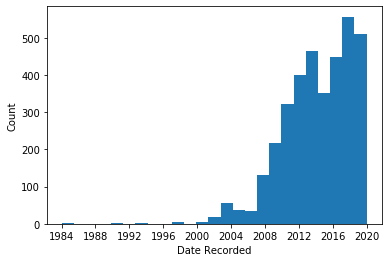

In [98]:
plt.hist(talk_df[talk_df.date_recorded.notnull()].date_recorded, bins = 25);
plt.xlabel('Date Recorded')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

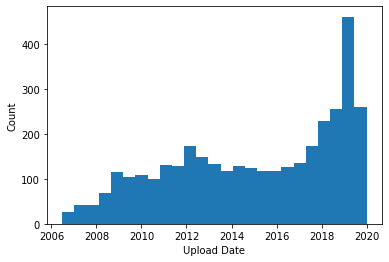

In [100]:
plt.hist(talk_df[talk_df.upload_date.notnull()].upload_date, bins = 25);
plt.xlabel('Upload Date')
plt.ylabel('Count')

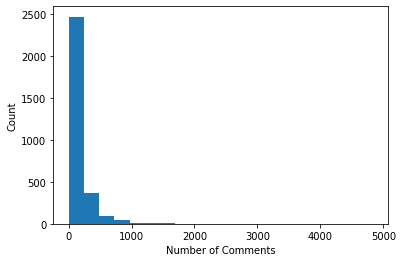

In [102]:
plt.hist(talk_df.comments, bins = 20);
plt.xlabel('Number of Comments');
plt.ylabel('Count');